In [1]:
import tensorflow as tf
import os
import numpy as np

In [2]:
dataset = r"G:/breast_cancer_mri"

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.2
)

validation_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [4]:
train_gen = train_data.flow_from_directory(
    dataset,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    subset='training'
) 

validation_gen = validation_data.flow_from_directory(
    dataset,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 625 images belonging to 3 classes.
Found 155 images belonging to 3 classes.


In [5]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob

In [6]:
vgg = VGG16(
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3),
    weights='imagenet',
    include_top=False
)
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [7]:
for layer in vgg.layers:
    layer.trainable=False

In [9]:
x = Flatten()(vgg.output)
prediction = Dense(3, activation = 'softmax')(x)
model=Model(inputs = vgg.input, outputs = prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epoch = 20

history = model.fit(train_gen,
                    steps_per_epoch = len(train_gen),
                    epochs = epoch,
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen)
                   )

Epoch 1/20
20/20 [==============================] - 90s 4s/step - loss: 0.6145 - accuracy: 0.5504 - val_loss: 0.5371 - val_accuracy: 0.6452
Epoch 2/20
20/20 [==============================] - 86s 4s/step - loss: 0.4533 - accuracy: 0.6848 - val_loss: 0.5063 - val_accuracy: 0.5935
Epoch 3/20
20/20 [==============================] - 87s 4s/step - loss: 0.3744 - accuracy: 0.7744 - val_loss: 0.4702 - val_accuracy: 0.6258
Epoch 4/20
20/20 [==============================] - 87s 4s/step - loss: 0.3466 - accuracy: 0.7776 - val_loss: 0.4658 - val_accuracy: 0.6452
Epoch 5/20
20/20 [==============================] - 87s 4s/step - loss: 0.3291 - accuracy: 0.7840 - val_loss: 0.4721 - val_accuracy: 0.6645
Epoch 6/20
20/20 [==============================] - 87s 4s/step - loss: 0.3111 - accuracy: 0.8080 - val_loss: 0.4923 - val_accuracy: 0.6065
Epoch 7/20
20/20 [==============================] - 87s 4s/step - loss: 0.3032 - accuracy: 0.8128 - val_loss: 0.4594 - val_accuracy: 0.6452
Epoch 8/20
20/20 [==

In [12]:
score = model.evaluate(validation_gen)

5/5 [==============================] - 18s 4s/step - loss: 0.5070 - accuracy: 0.6710


In [13]:
score

[0.5069975256919861, 0.6709677577018738]

In [14]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 20}

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [17]:
import matplotlib.pyplot as plt

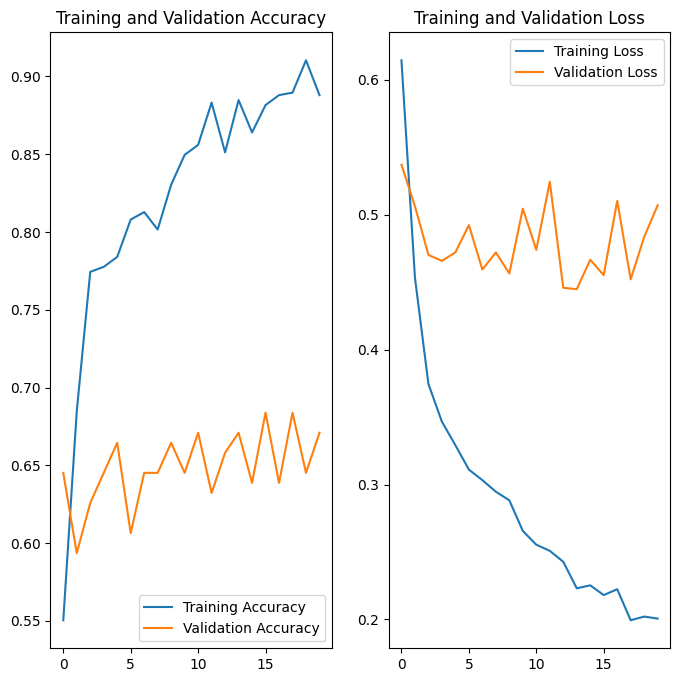

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epoch), acc, label='Training Accuracy')
plt.plot(range(epoch), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epoch), loss, label='Training Loss')
plt.plot(range(epoch), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
model_version = "bc_mri_VGG16"
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/bc_mri_VGG16\assets
